In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Classes')

import Potentials
import Molecular_Dynamics

from importlib import reload
reload(Molecular_Dynamics)
reload(Potentials)
#reload(Optimisation)
from Molecular_Dynamics import *
from Potentials import *
#from Optimisation import *

pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)


def format(ax):
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_aspect('equal')
    return ax


<Axes: title={'center': 'Ek=0.0 Ep=-35.3 E=-35.3'}>

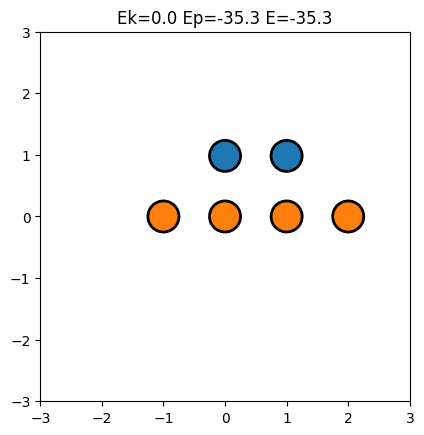

In [76]:
positions = np.array([[-1,0], [0,0],[1,0], [2,0],[0,1],[1,1]])   
static = np.array([True,True, True, True,False,False])

cluster = AtomicCluster(calc = LennardJones(), pos = positions, static=static)

fig, ax = plt.subplots()

relax(cluster, steps = 1000)
cluster.draw(ax, edge=True, size = 500)
format(ax)


In [89]:
from matplotlib.animation import FuncAnimation
plt.rc('animation', html='jshtml')

def update(i):
    ax.clear()
    format(ax)
    velocity_verlet(cluster, N = 5)
    drawing_object = cluster.draw(ax, edge=True, size = 500)
    return drawing_object


anim = FuncAnimation(fig, update, frames = 10)
anim.save('test.gif', writer='imagemagick', fps=10)


Accepted 17 out of 1000 samples: 1.7% acceptance rate
Done


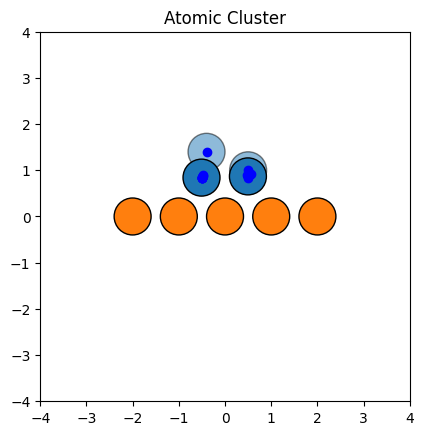

In [28]:
static_points = np.array([[-2,0], [-1,0], [0,0], [1,0], [2,0]])

non_static_points = np.array([[-0.4, 1.4], [0.5, 1]])


LJ_optimizer = LennardJones()

LJ_optimizer.sample_MCMC(1000, initial_point=non_static_points, static_points = static_points)
new_points = LJ_optimizer.mcmc
#print(new_points)
#rint(new_points[:,0])
fig, ax = plt.subplots()




new_cluster = AtomicCluster(new_points[-1])
static_cluster = AtomicCluster(static_points)
non_static_cluster = AtomicCluster(non_static_points)

non_static_circles = non_static_cluster.draw(ax, set_color='C0')
new_circles = new_cluster.draw(ax, set_color='C0')
static_circles = static_cluster.draw(ax, set_color='C1')

ax.plot(new_points[:,0][:,0][::100], new_points[:,0][:,1][::100], 'o', color='blue', alpha=1)
ax.plot(new_points[:,1][:,0][::100], new_points[:,1][:,1][::100], 'o', color='blue', alpha=1)

[c.set_alpha(1) for c in static_circles]
[c.set_alpha(0.5) for c in non_static_circles]
[c.set_alpha(1) for c in new_circles]

print('Done')




[None, None]

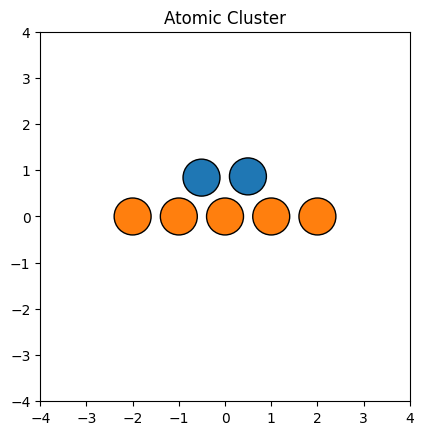

In [29]:
init_points = [[0.5, 1],[-0.5, 1.5]]

rs, V_avg, C_V_MD = LJ_optimizer.constant_temp_MD(r0 = init_points, N = 100, static_points = static_points, dt = 0.01)


xs1 = np.array(rs)[:, 0, :]
xs2 = np.array(rs)[:, 1, :]

fig, ax = plt.subplots()


new_circles = new_cluster.draw(ax, set_color='C0')
static_circles = static_cluster.draw(ax, set_color='C1')



[c.set_alpha(1) for c in static_circles]
[c.set_alpha(1) for c in new_circles]



In [30]:
from matplotlib.animation import FuncAnimation

def update(i):
    for xs, circle in zip([xs1, xs2], new_circles):
        circle.set_center(xs[i])
    return new_circles
        

ani = FuncAnimation(fig, update, frames=range(len(xs1)), blit=True)
ani.save('Figures/MD.gif', writer='imagemagick', fps=30)